In [ ]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn import metrics
%matplotlib inline

In [ ]:
# Đọc dữ liệu seeds trên uci
# các đặc tính hình học của hạt thuộc ba giống lúa mì khác nhau
df = pd.read_csv("/content/seeds_dataset.txt", sep="\t", )
df.columns = ["A","P","C","LK", "WK","A_Coef", "Length of Kernel Groove", "target"]

In [ ]:
df.head()

,A,P,C,LK,WK,A_Coef,Length of Kernel Groove,target
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


In [ ]:
# Hiện thị thông tin ngắn ngọn 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   A                        209 non-null    float64
 1   P                        209 non-null    float64
 2   C                        209 non-null    float64
 3   LK                       209 non-null    float64
 4   WK                       209 non-null    float64
 5   A_Coef                   209 non-null    float64
 6   Length of Kernel Groove  209 non-null    float64
 7   target                   209 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [ ]:
# Trả về số lượng các giá trị của từng cột
for col in df.columns:
    print ("---- %s ---" % col)
    print (df[col].value_counts())

---- A ---
15.38    3
11.23    3
14.11    3
18.72    2
18.98    2
        ..
19.11    1
16.82    1
16.77    1
17.32    1
12.30    1
Name: A, Length: 193, dtype: int64
---- P ---
13.47    4
13.05    3
13.67    3
16.26    3
13.41    3
        ..
15.55    1
15.34    1
16.19    1
16.89    1
13.34    1
Name: P, Length: 169, dtype: int64
---- C ---
0.8823    3
0.8811    2
0.8722    2
0.8706    2
0.8849    2
         ..
0.8750    1
0.8892    1
0.8894    1
0.8780    1
0.8684    1
Name: C, Length: 185, dtype: int64
---- LK ---
5.236    3
5.395    3
5.979    2
6.037    2
5.267    2
        ..
5.927    1
6.064    1
6.579    1
6.445    1
5.243    1
Name: LK, Length: 187, dtype: int64
---- WK ---
3.026    3
3.333    2
3.485    2
2.821    2
2.763    2
        ..
3.467    1
3.864    1
3.772    1
3.801    1
2.974    1
Name: WK, Length: 184, dtype: int64
---- A_Coef ---
2.700    2
2.129    2
1.018    1
2.221    1
3.526    1
        ..
3.824    1
4.451    1
5.064    1
2.858    1
5.637    1
Name: A_Coef,

In [ ]:
df["target"] = df["target"].apply(lambda x: x-1)

In [ ]:
# Tạo thống kê mô tả
df.describe()

,A,P,C,LK,WK,A_Coef,Length of Kernel Groove,target
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,14.845550,14.557943,0.870999,5.627890,3.258349,3.707278,5.408971,1.004785
std,2.916545,1.308949,0.023686,0.444029,0.378603,1.503657,0.492487,0.817463
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,0.000000
25%,12.260000,13.450000,0.856700,5.262000,2.941000,2.587000,5.045000,0.000000
50%,14.340000,14.290000,0.873500,5.520000,3.232000,3.600000,5.224000,1.000000
75%,17.320000,15.730000,0.887900,5.980000,3.562000,4.773000,5.877000,2.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,2.000000


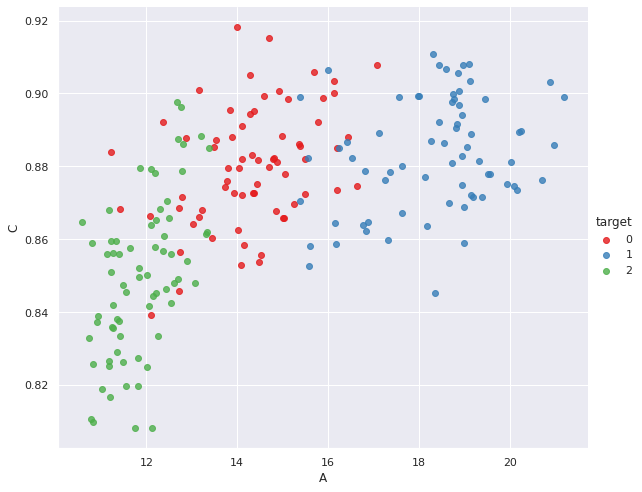

In [ ]:
import warnings
warnings.filterwarnings("ignore")

sns.set(style="darkgrid")
sns.lmplot('A','C',data=df, hue='target', palette='Set1',size=7,aspect=1.2,fit_reg=False);

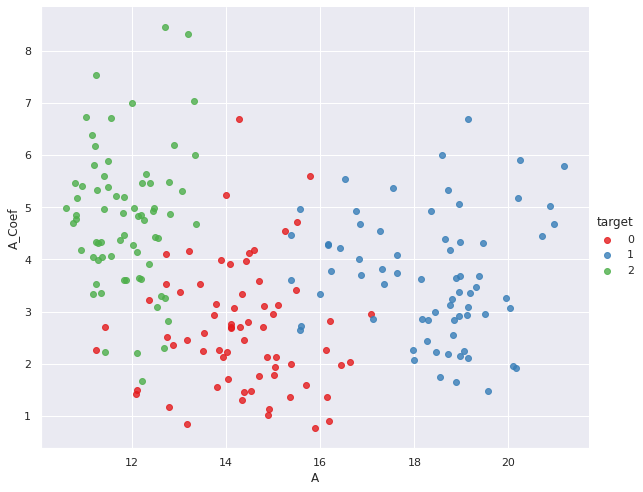

In [ ]:
sns.lmplot('A','A_Coef',data=df, hue='target',palette='Set1',size=7,aspect=1.2,fit_reg=False);

In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [ ]:
centers = kmeans.cluster_centers_
centers

array([[11.96441558, 13.27480519,  0.8522    ,  5.22928571,  2.87292208,
         4.75974026,  5.08851948],
       [18.72180328, 16.29737705,  0.88508689,  6.20893443,  3.72267213,
         3.60359016,  6.06609836],
       [14.63985915, 14.45507042,  0.87928169,  5.56097183,  3.27742254,
         2.65496056,  5.19192958]])

In [ ]:
k_labels = kmeans.labels_
df['klabels'] = k_labels
df.head(10)

,A,P,C,LK,WK,A_Coef,Length of Kernel Groove,target,klabels
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0,2
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0,2
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0,2
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0,2
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,0,2
5,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,0,2
6,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,0,2
7,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,0,2
8,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,0,2
9,15.26,14.85,0.8696,5.714,3.242,4.543,5.314,0,2


In [ ]:
df.klabels.value_counts()

0    77
2    71
1    61
Name: klabels, dtype: int64

In [ ]:
df.target.value_counts()

1    70
2    70
0    69
Name: target, dtype: int64

In [ ]:
# tính silhouette
cluster_labels = kmeans.fit_predict(X)
silhouette_avg = metrics.silhouette_score(X, cluster_labels)
print ('silhouette coefficient for the above clutering = ', silhouette_avg)

silhouette coefficient for the above clutering =  0.47072932197368833


In [ ]:
# tính purity
def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

purity = purity_score(y,k_labels)
print ('Purity for the above clutering = ', purity)

Purity for the above clutering =  0.8947368421052632


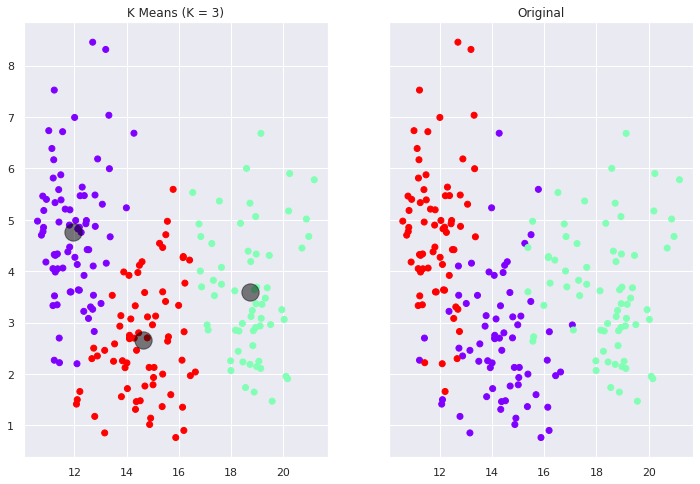

In [ ]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True,figsize = (12,8) )

ax1.set_title('K Means (K = 3)')
ax1.scatter(x = df['A'], y = df['A_Coef'], c = df['klabels'], cmap='rainbow')
ax1.scatter(x=centers[:, 0], y=centers[:, 5], c='black',s=300, alpha=0.5);

ax2.set_title("Original")
ax2.scatter(x = df['A'], y = df['A_Coef'], c = df['target'], cmap='rainbow')

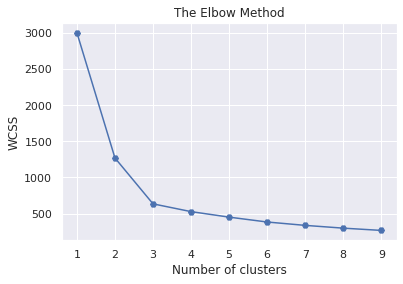

In [ ]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss, marker = 'H')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()